In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
data=pd.read_csv('/content/ISEAR_Clean(1).csv')


In [ ]:
data1=data[data['Emotion'].str.contains('shame')==False]

In [ ]:
data1.to_csv('data1.csv',index=False)

In [ ]:
data2=pd.read_csv('/content/data1.csv')

In [ ]:
data2

,Emotion,Statement
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...
...,...,...
6385,joy,I received a letter from a distant friend.
6386,fear,My parents were out and I was the eldest at ho...
6387,fear,I was at home and I heard a loud sound of spit...
6388,guilt,I did not do the homework that the teacher had...


In [ ]:
data.shape

(7447, 2)

In [ ]:
data.isna().any(axis=1).sum()

0

In [ ]:
ps= PorterStemmer()

def preprocess(line):
  review = re.sub('[^a-zA-Z]',' ',line)
  review =review.lower()
  review = review.split()

  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  return " ".join(review)

In [ ]:
data['Statement']=data['Statement'].apply(lambda x: preprocess(x))

In [ ]:
from sklearn import preprocessing

label_encoder= preprocessing.LabelEncoder()
data['N_label']=label_encoder.fit_transform(data['Emotion'])

In [ ]:
data['Statement']

0       day feel close partner friend feel peac also e...
1       everi time imagin someon love could contact se...
2                   obvious unjustli treat possibl elucid
3       think short time live relat period life think ...
4       gather found involuntarili sit next two peopl ...
                              ...                        
7442    two year back someon invit tutor grand daughte...
7443    taken respons someth prepar howev fail timid t...
7444    home heard loud sound spit outsid door thought...
7445                 homework teacher ask us scold immedi
7446       shout younger brother alway afraid call loudli
Name: Statement, Length: 7447, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=7000, ngram_range=(1,2))
data_cv = cv.fit_transform(data['Statement']).toarray()

In [ ]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_cv,data['N_label'], test_size=0.20, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from keras.layers import Input, Dense, Flatten, LSTM, GRU


In [ ]:
X_test.shape

(1490, 7000)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def lstm_model():
  model=Sequential()
  model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(7, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

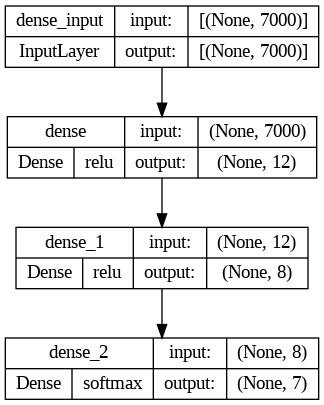

In [ ]:
tf.keras.utils.plot_model(
lstm_model(),
to_file="simple.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
def get_accuracy (model):
  history=model.fit(X_train, y_train, epochs=5, batch_size=20)
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

    # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Epoch 1/5
298/298 [==============================] - 2s 4ms/step - loss: 1.8542 - accuracy: 0.2686
Epoch 2/5
298/298 [==============================] - 1s 4ms/step - loss: 1.3394 - accuracy: 0.6082
Epoch 3/5
298/298 [==============================] - 1s 4ms/step - loss: 0.8566 - accuracy: 0.7566
Epoch 4/5
298/298 [==============================] - 1s 4ms/step - loss: 0.5868 - accuracy: 0.8382
Epoch 5/5
298/298 [==============================] - 1s 5ms/step - loss: 0.4195 - accuracy: 0.8909


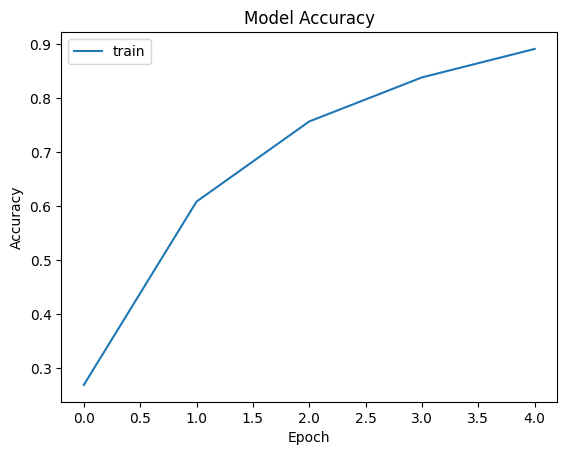

KeyError: ignored

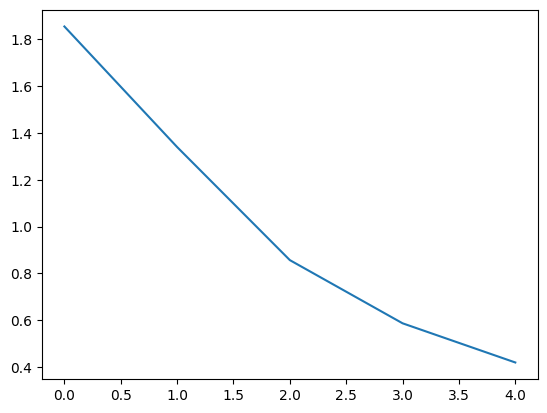

In [ ]:
get_accuracy(lstm_model())

In [ ]:

model=Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=20)
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
_, accuracy1 = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy1*100))
 # summarize history for accuracy
plt.plot(history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

    # summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Epoch 1/5
298/298 [==============================] - 2s 5ms/step - loss: 1.8649 - accuracy: 0.2523
Epoch 2/5
298/298 [==============================] - 2s 6ms/step - loss: 1.4354 - accuracy: 0.4650
Epoch 3/5
298/298 [==============================] - 2s 6ms/step - loss: 1.0282 - accuracy: 0.6570
Epoch 4/5
298/298 [==============================] - 1s 5ms/step - loss: 0.7383 - accuracy: 0.7824
Epoch 5/5
187/187 [==============================] - 1s 3ms/step - loss: 0.3810 - accuracy: 0.9147
Accuracy: 91.47
47/47 [==============================] - 0s 3ms/step - loss: 1.5125 - accuracy: 0.5376
Accuracy: 53.76


TypeError: ignored

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
import numpy as np

In [ ]:
y_pred= model.predict(X_test)


a=np.argmax(y_pred, axis=1)
# b=np.argmax(y_test,axis=1)
# a=label_encoder.inverse_transform(a)
# a

47/47 [==============================] - 0s 4ms/step


In [ ]:
a[0:10]

array([5, 1, 6, 4, 4, 6, 3, 2, 6, 5])

In [ ]:
b=label_encoder.inverse_transform(a)

In [ ]:
y_test

2284    3
3164    1
6961    6
1559    4
4035    4
       ..
438     6
6449    6
4958    5
434     2
751     0
Name: N_label, Length: 1490, dtype: int64

In [ ]:
tr = y_test.replace(to_replace=0,value="anger")
tr = tr.replace(to_replace=1,value="disgust")
tr = tr.replace(to_replace=2,value="fear")
tr = tr.replace(to_replace=3,value="guilt")
tr = tr.replace(to_replace=4,value="joy")
tr = tr.replace(to_replace=5,value="sadness")
tr = tr.replace(to_replace=6,value="shame")

tr

2284      guilt
3164    disgust
6961      shame
1559        joy
4035        joy
         ...   
438       shame
6449      shame
4958    sadness
434        fear
751       anger
Name: N_label, Length: 1490, dtype: object

In [ ]:
b

array(['sadness', 'disgust', 'shame', ..., 'joy', 'joy', 'anger'],
      dtype=object)

In [ ]:
print(classification_report(tr,b))

              precision    recall  f1-score   support

       anger       0.51      0.41      0.46       223
     disgust       0.61      0.60      0.61       230
        fear       0.71      0.66      0.68       211
       guilt       0.41      0.48      0.44       207
         joy       0.66      0.73      0.69       207
     sadness       0.57      0.54      0.55       198
       shame       0.45      0.48      0.46       214

    accuracy                           0.56      1490
   macro avg       0.56      0.56      0.56      1490
weighted avg       0.56      0.56      0.56      1490



In [ ]:
# y_pred= model.predict(X_test)
print(classification_report(y_test,a))
# y_pred

              precision    recall  f1-score   support

           0       0.51      0.41      0.46       223
           1       0.61      0.60      0.61       230
           2       0.71      0.66      0.68       211
           3       0.41      0.48      0.44       207
           4       0.66      0.73      0.69       207
           5       0.57      0.54      0.55       198
           6       0.45      0.48      0.46       214

    accuracy                           0.56      1490
   macro avg       0.56      0.56      0.56      1490
weighted avg       0.56      0.56      0.56      1490



In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


47/47 [==============================] - 0s 4ms/step - loss: 1.3472 - accuracy: 0.5564
Accuracy: 55.64


In [ ]:
import numpy as np

In [ ]:
text='she is a bad girl'
text=preprocess(text)
array = cv.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 37ms/step


'disgust'